In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
uhi_data = pd.read_csv(f'uhi_data_all.csv')
uhi_data_all = uhi_data.drop(columns = ['UHI Index', 'Longitude', 'Latitude'])

uhi_data_select = uhi_data[['UHI Index', 'B01', 'NDVI', 'NDBI', 'NDWI', 'BVW']]

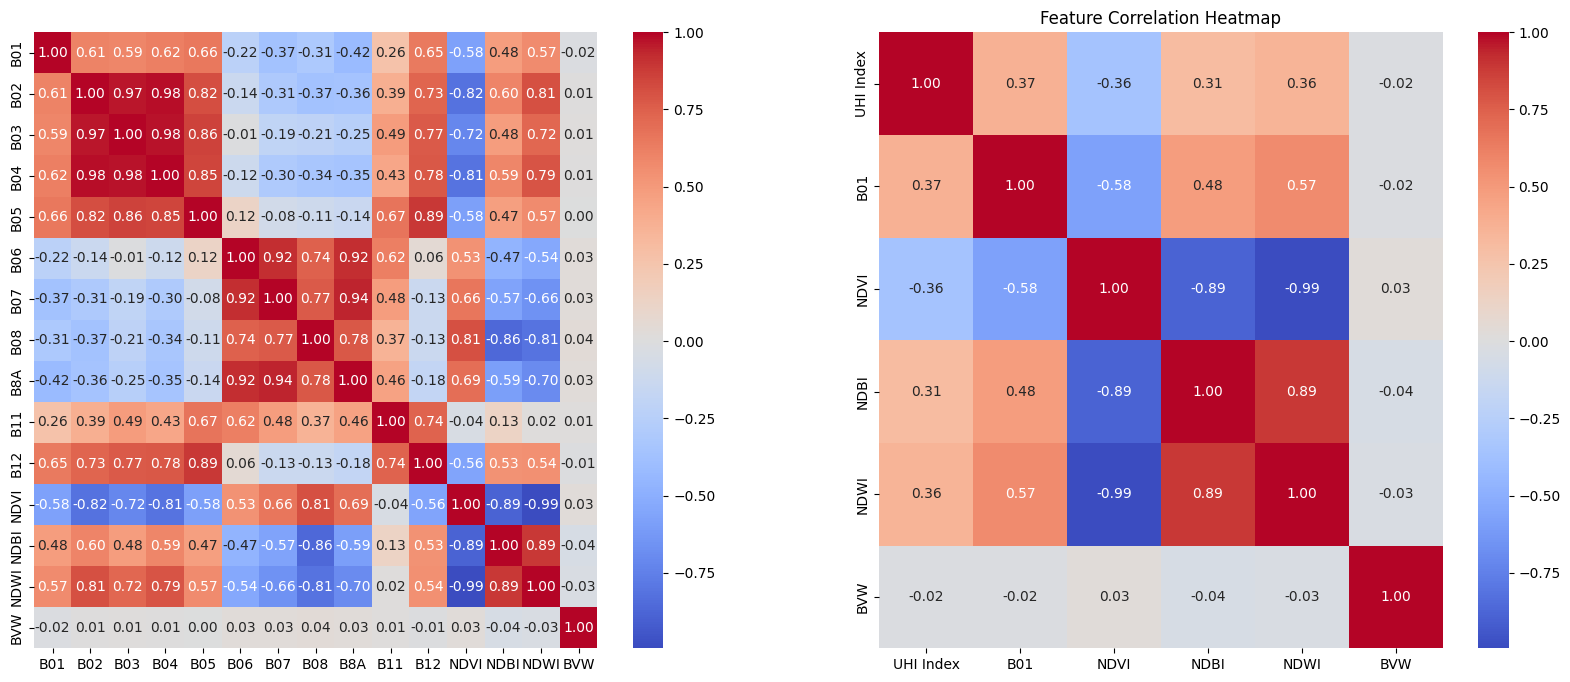

In [ ]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.heatmap(uhi_data_all.corr(), annot=True, cmap = 'coolwarm', fmt = ".2f")

plt.subplot(1,2,2)
sns.heatmap(uhi_data_select.corr(), annot=True, cmap = 'coolwarm', fmt = ".2f")

plt.title("Feature Correlation Heatmap")
plt.show()

# Average Data

In [5]:
win = 200

uhi_data = pd.read_csv(f'uhi_data_{win}.csv')
uhi_data = uhi_data.drop(columns = ['Longitude', 'Latitude','Unnamed: 0'])
uhi_data_ft = uhi_data.drop(columns = ['UHI Index'])

feature_names = list(uhi_data_ft.columns)
X = uhi_data_ft.values
y = uhi_data['UHI Index'].values

In [6]:
uhi_data.head()

UHI Index        B01        B02        B03        B04        B05  \
0   0.993571  1287.2883  1380.0105  1621.2031  1414.1565  1968.7659   
1   0.994674  1286.7960  1378.9474  1618.5430  1413.1602  1965.0134   
2   0.993571  1288.3206  1381.7826  1623.8916  1415.7727  1971.8828   
3   0.994674  1286.5339  1379.1285  1618.0940  1413.2465  1963.7202   
4   0.993571  1289.6743  1385.3275  1629.0712  1419.6284  1976.7620   

         B06        B07        B08        B8A  ...      NDWI   B11/B12  \
0  3801.2890  4486.3027  4784.1670  4777.1514  ... -0.493799  1.485631   
1  3796.3740  4482.4155  4779.1045  4773.6724  ... -0.494019  1.485644   
2  3805.9824  4491.3250  4786.0570  4779.8770  ... -0.493321  1.485225   
3  3800.1794  4489.6196  4784.7686  4781.7530  ... -0.494572  1.486568   
4  3814.2192  4497.7324  4790.9854  4782.9890  ... -0.492506  1.484594   

        VWI  Building_Index  Soil_Ratio  Vegetation_Health  NDVI_NDBI  \
0  1.593430        1.485631    0.847310           3.466761  -0.124409   
1  1.594026        1.485644    0.846948           3.465763  -0.124477   
2  1.592819        1.485225    0.847407           3.463683  -0.124250   
3  1.595216        1.486568    0.846437           3.469415  -0.124760   
4  1.592063        1.484594    0.848032           3.458377  -0.123992   

   NDVI_NDWI  NDBI_NDWI     B08_NDVI  
0  -0.268477   0.112991  2601.137715  
1  -0.268535   0.113129  2597.789392  
2  -0.268088   0.112793  2600.905466  
3  -0.269031   0.113431  2602.761177  
4  -0.267351   0.112495  2600.728798  

[5 rows x 24 columns]

<Axes: >

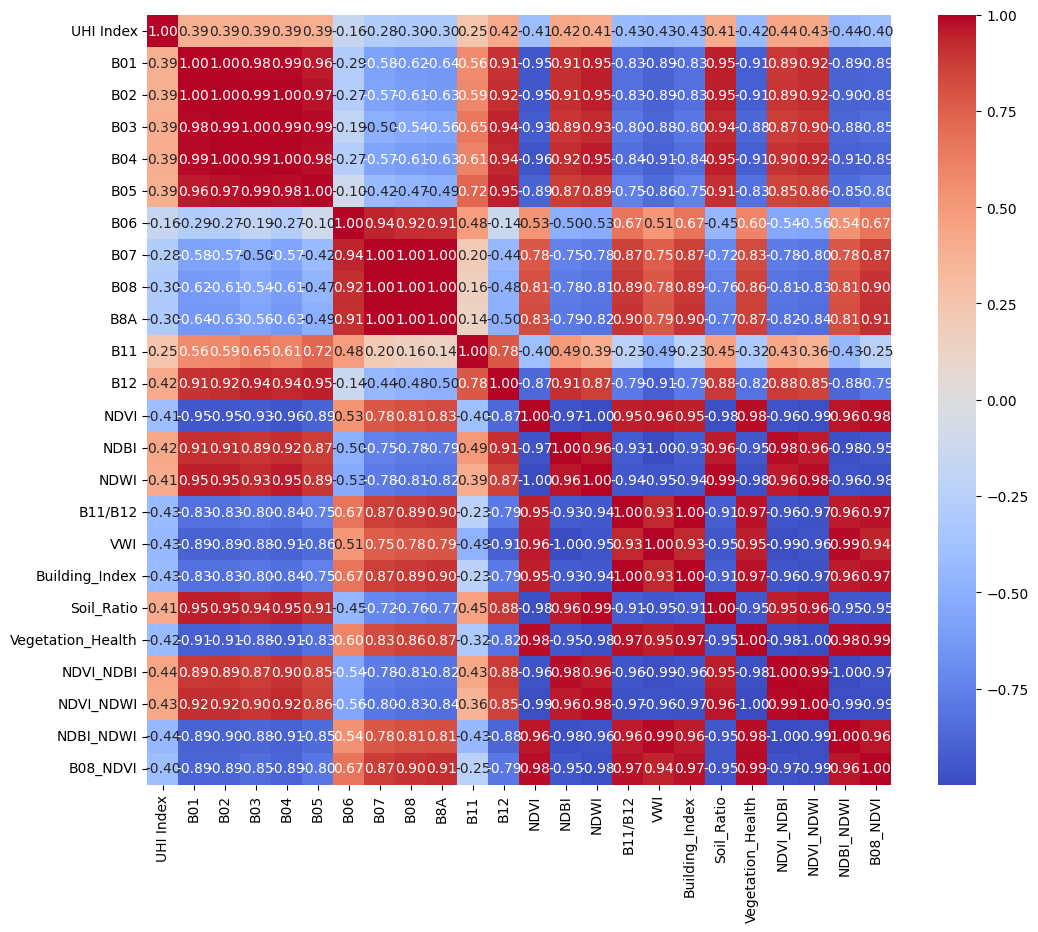

In [7]:

plt.figure(figsize = (12, 10))
sns.heatmap(uhi_data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

In [10]:
uhi_data_ft.head()
print(len(uhi_data_ft.columns))

23


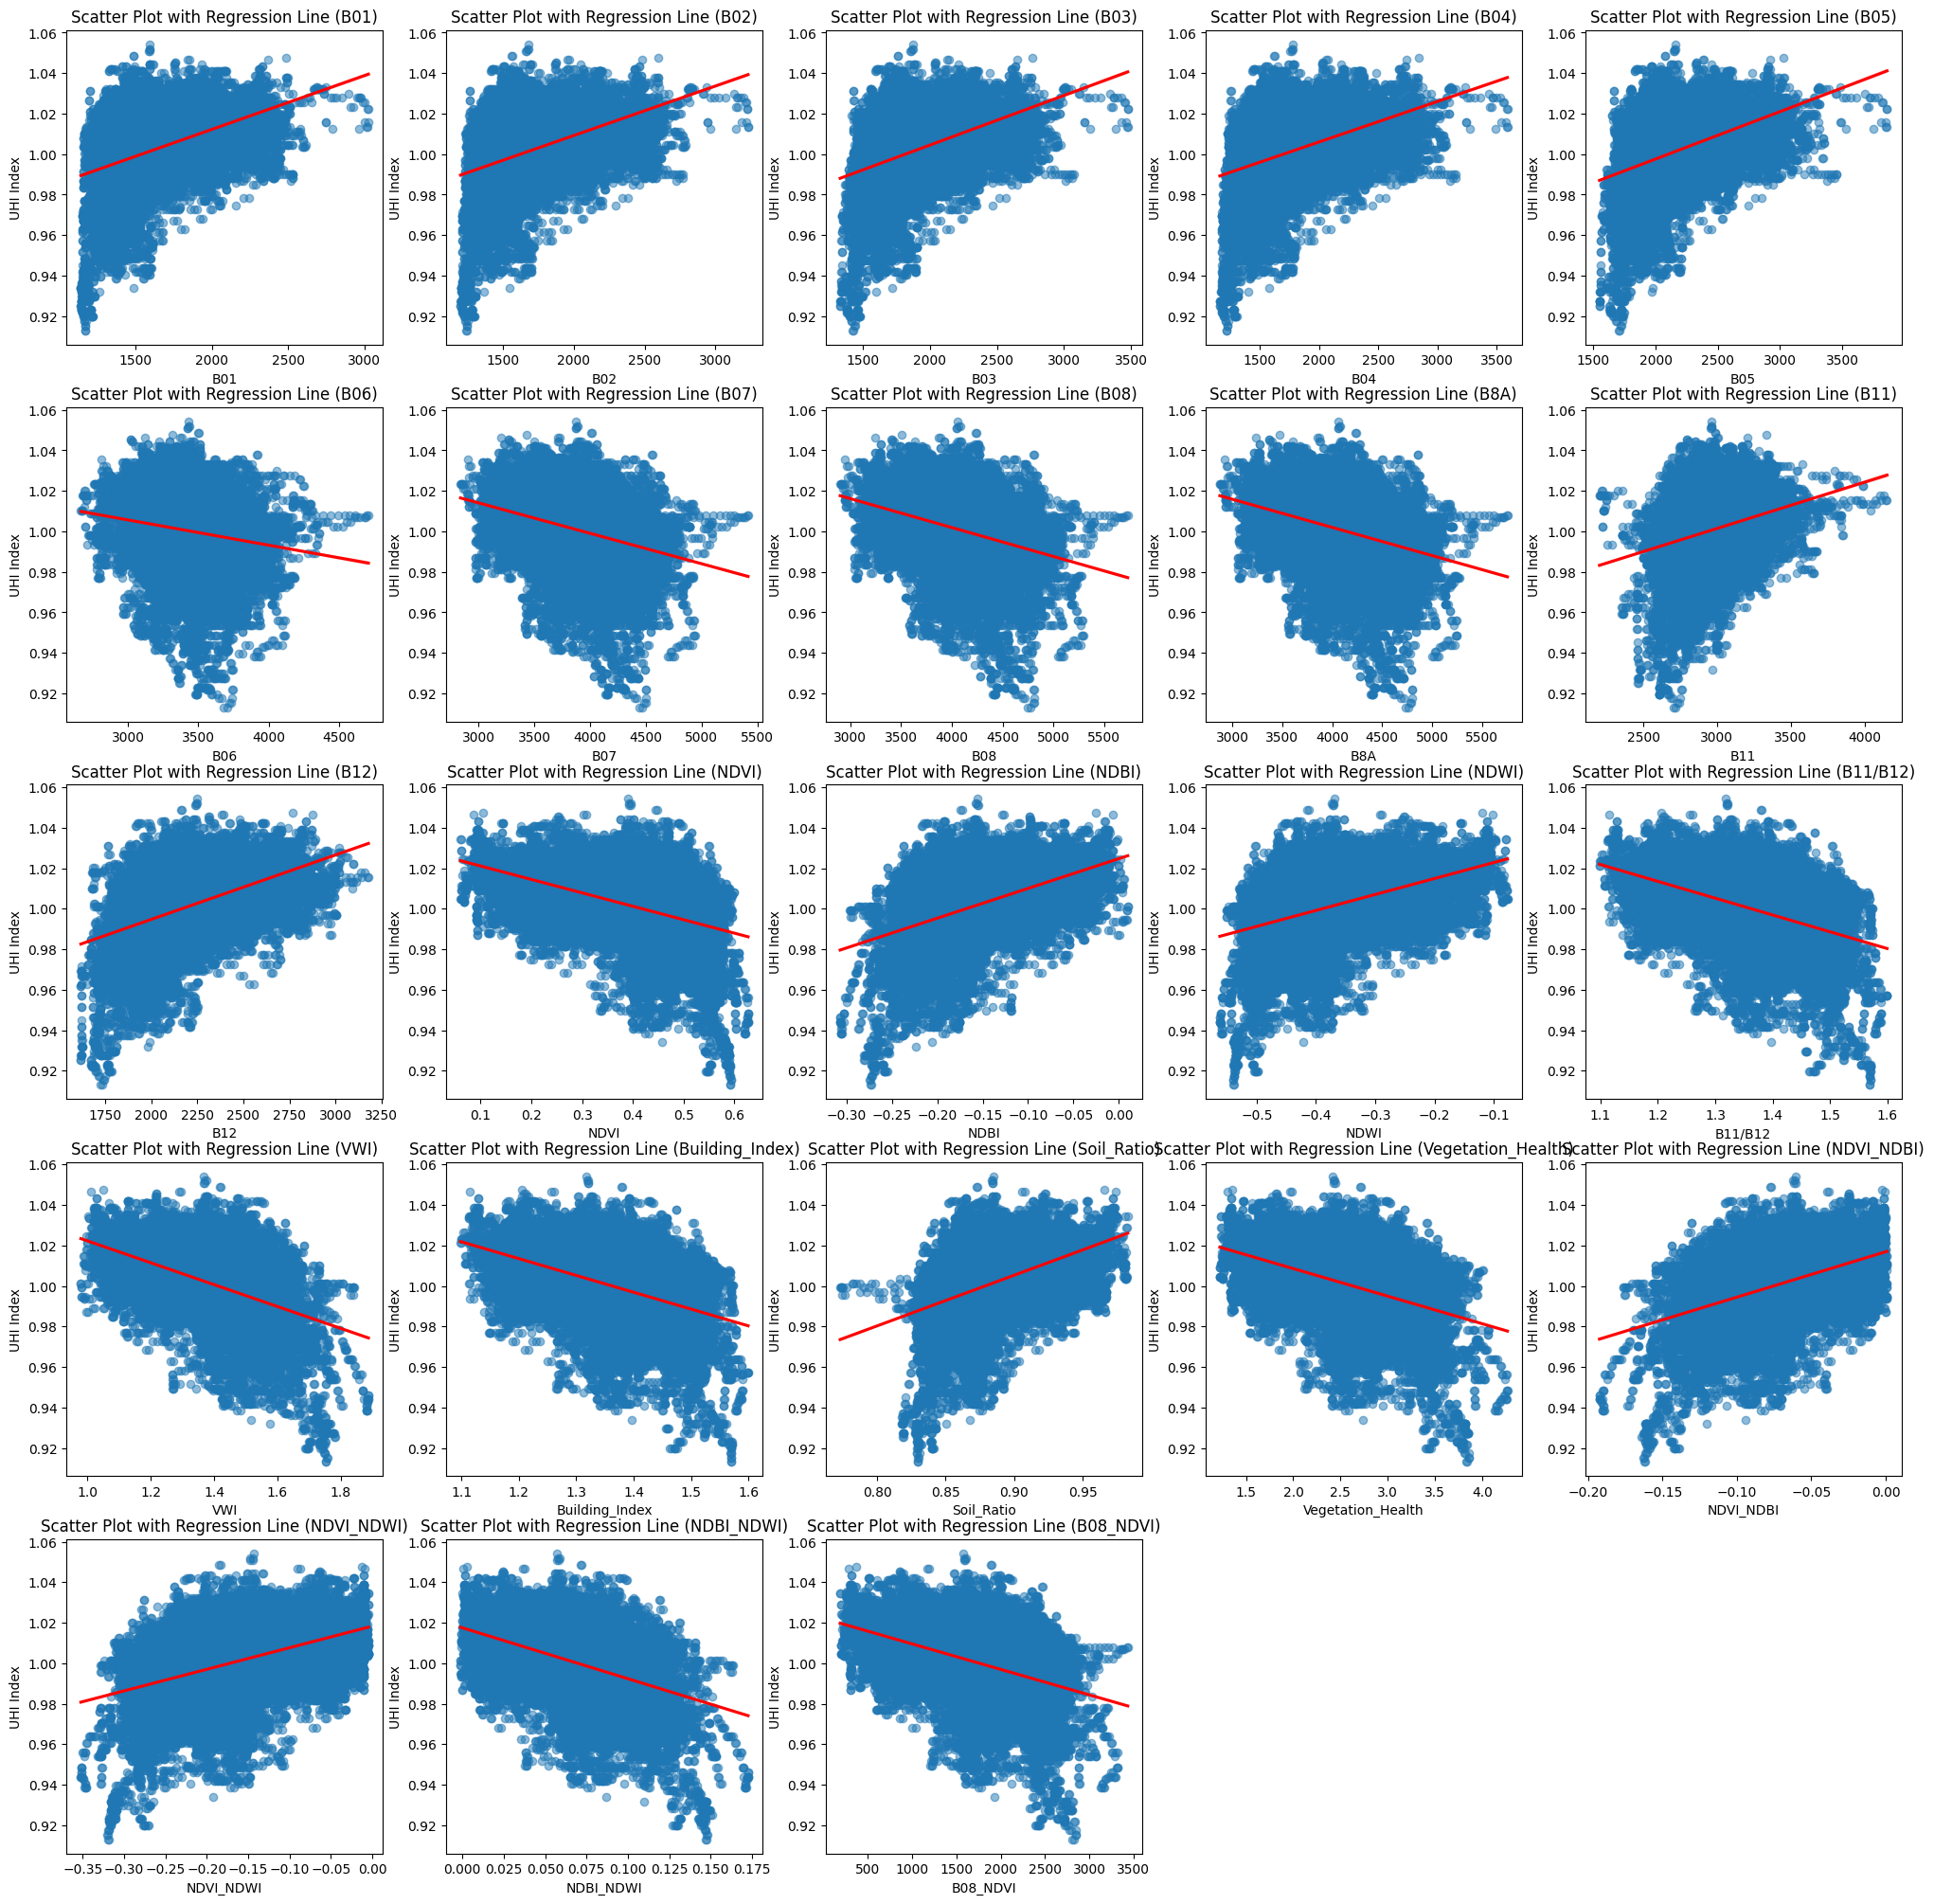

In [12]:
col = uhi_data_ft.columns

plt.figure(figsize = (25,25))

for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.regplot(x=uhi_data_ft[col[i]], y=uhi_data['UHI Index'], 
                scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Scatter Plot with Regression Line ({col[i]})")

plt.show()

# PCA feature reduction
* Make sure PCA requires standardization before PCA.
* X_pca is not data which includes the features that PCA chooses as the most important features.  

    X data mapped to PCAxis


In [ ]:
from sklearn.decomposition import PCA


train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# X_B01_train_scaled = X_train_scaled[:,0]
# X_B01_test_scaled = X_test_scaled[:,0]

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled) 


In [23]:
X_train_pca

array([[ 5.70968915,  2.07673487],
       [ 5.71625368,  2.0339855 ],
       [ 5.69561398,  2.10949163],
       ...,
       [ 6.98040872,  4.32422173],
       [ 2.35700288, -0.44519714],
       [ 3.32303148,  1.78061042]], shape=(27599, 2))

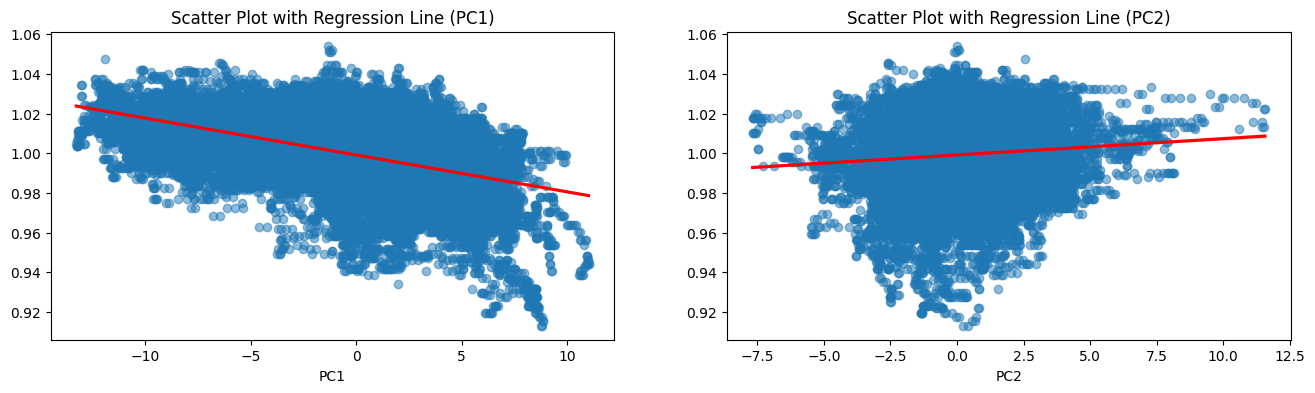

In [24]:
X_train_pcafig = pd.DataFrame(X_train_pca, columns = [f'PC{pc+1}' for pc in range(len(X_train_pca[0]))])
X_test_pcafig = pd.DataFrame(X_test_pca, columns = [f'PC{pc+1}' for pc in range(len(X_train_pca[0]))])


col = X_train_pcafig.columns

plt.figure(figsize = (16,4))

for i in range(len(col)):
    plt.subplot(1,len(X_train_pca[0]),i+1)
    sns.regplot(x=X_train_pcafig[col[i]], y=y_train, 
                scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Scatter Plot with Regression Line ({col[i]})")

plt.show()


# Feature Importance
* Selected features based on Tree-based algorithms does not need original data be standardized

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance_rf = rf.feature_importances_

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance_rf})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("RandomForest Feature Importance:")
print(feature_importance_df.head(5)) 


RandomForest Feature Importance:
       Feature  Importance
0          B01    0.181728
3          B04    0.095628
17  Soil_Ratio    0.068597
9          B11    0.058452
4          B05    0.051652


# Feature Combination
* PC1, PC2, PC... ; PCA analysis
* The most important feature from RandomForestTree-based importance  


In [ ]:
X_B01_train_scaled = X_train_scaled[:,0]
X_B01_test_scaled = X_test_scaled[:,0]

X_train_comb = X_train_pcafig.cbopy()
X_train_comb['B01'] = X_B01_train_scaled

X_test_comb = X_test_pcafig.copy()
X_test_comb['B01'] = X_B01_test_scaled

X_train_comb.head()

PC1       PC2       PC3       B01
0  0.037622 -2.239044  0.111428 -0.668618
1  0.049219 -2.258382  0.105539 -0.653899
2  0.250068 -1.927354  0.150404 -0.683962
3  0.034998 -2.396461  0.107479 -0.636258
4  0.753357 -1.394762  0.217674 -0.704571

# Data preparation with tensor

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import r2_score

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)  

X_train = X_train_pca
y_train = y_train

X_train = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train = torch.tensor(y_train, dtype=torch.float32, device=device).view(-1, 1)

X_test = torch.tensor(X_test_pca, dtype=torch.float32, device=device)
y_test = torch.tensor(y_test, dtype=torch.float32, device=device).view(-1, 1)


batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Using device: mps


In [27]:
print(len(X_train))
print(len(y_train))

27599
27599


# Training MultiLayer Perceptron  
  
  Decreasing R^2 as epoch goes

In [29]:

class UHI_MLP(nn.Module):
    def __init__(self, input_dim):
        super(UHI_MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),  # Batch Normalization
            nn.Dropout(0.3),  # Dropout (Regularization)
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.3),
            
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)
    

input_dim = 2
model = UHI_MLP(input_dim).to(device)

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

epochs = 100

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    if (epoch+1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            train_predictions = model(X_train.to(device)).cpu().numpy()
            y_train_np = y_train.cpu().numpy()

            train_loss = criterion(torch.tensor(train_predictions), torch.tensor(y_train_np)).item()
            train_r2 = r2_score(y_train_np, train_predictions)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Train MSE: {train_loss:.4f}, Train R²: {train_r2:.4f}")

model.eval()
with torch.no_grad():
    test_predictions = model(X_test.to(device)).cpu().numpy()
    y_test_np = y_test.cpu().numpy()

    test_loss = criterion(torch.tensor(test_predictions), torch.tensor(y_test_np)).item()
    test_r2 = r2_score(y_test_np, test_predictions)

print(f"Final Test MSE Loss: {test_loss:.4f}")
print(f"Final Test R² Score: {test_r2:.4f}")

Epoch 10/100, Loss: 0.0003, Train MSE: 0.0003, Train R²: 0.2032
Epoch 20/100, Loss: 0.0003, Train MSE: 0.0002, Train R²: 0.2480
Epoch 30/100, Loss: 0.0003, Train MSE: 0.0002, Train R²: 0.2735
Epoch 40/100, Loss: 0.0003, Train MSE: 0.0002, Train R²: 0.2711
Epoch 50/100, Loss: 0.0002, Train MSE: 0.0002, Train R²: 0.2760
Epoch 60/100, Loss: 0.0002, Train MSE: 0.0002, Train R²: 0.2627
Epoch 70/100, Loss: 0.0002, Train MSE: 0.0002, Train R²: 0.2620
Epoch 80/100, Loss: 0.0002, Train MSE: 0.0002, Train R²: 0.2692
Epoch 90/100, Loss: 0.0003, Train MSE: 0.0002, Train R²: 0.2862
Epoch 100/100, Loss: 0.0002, Train MSE: 0.0002, Train R²: 0.2692
Final Test MSE Loss: 0.0002
Final Test R² Score: -0.0070


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import r2_score
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

class ResidualMLP(nn.Module):
    def __init__(self, input_dim):
        super(ResidualMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.fc5 = nn.Linear(32, 1)

        self.shortcut = nn.Linear(input_dim, 32)  

    def forward(self, x):
        residual = self.shortcut(x)  # Residual Connection
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = F.leaky_relu(self.bn3(self.fc3(x)))
        x = F.leaky_relu(self.bn4(self.fc4(x)))
        x = x + residual  
        return self.fc5(x)

input_dim = 4
model = ResidualMLP(input_dim).to(device)

class HuberLoss(nn.Module):
    def __init__(self, delta=1.0):
        super().__init__()
        self.delta = delta

    def forward(self, y_pred, y_true):
        residual = torch.abs(y_true - y_pred)
        loss = torch.where(residual < self.delta, 0.5 * residual**2, self.delta * (residual - 0.5 * self.delta))
        return loss.mean()

criterion = HuberLoss(delta=1.0)

optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

epochs = 100
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    scheduler.step(running_loss)

    if (epoch+1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            train_predictions = model(X_train.to(device)).cpu().numpy()
            y_train_np = y_train.cpu().numpy()
            train_loss = criterion(torch.tensor(train_predictions), torch.tensor(y_train_np)).item()
            train_r2 = r2_score(y_train_np, train_predictions)

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Train MSE: {train_loss:.4f}, Train R²: {train_r2:.4f}")

model.eval()
with torch.no_grad():
    test_predictions = model(X_test.to(device)).cpu().numpy()
    y_test_np = y_test.cpu().numpy()
    test_loss = criterion(torch.tensor(test_predictions), torch.tensor(y_test_np)).item()
    test_r2 = r2_score(y_test_np, test_predictions)

print(f"Final Test MSE Loss: {test_loss:.4f}")
print(f"Final Test R² Score: {test_r2:.4f}")

# Vision transformer-based UHI prediction model

* Tokenizing satilate image data, then training the data

In [ ]:

from torchvision import models


device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

X = uhi_data_ft.values
y = uhi_data['UHI Index'].values

num_samples = X.shape[0]
X_reshaped = np.repeat(X[:, :, np.newaxis, np.newaxis], 224, axis=2).repeat(224, axis=3) 
X_reshaped = X_reshaped[:, :3, :, :]

X_tensor = torch.tensor(X_reshaped, dtype=torch.float32, device=device)
y_tensor = torch.tensor(y, dtype=torch.float32, device=device).view(-1, 1)

train_size = int(0.8 * len(X))
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

vit_model = models.vit_b_16(weights=None)
vit_model.heads = nn.Linear(768, 1)

vit_model = vit_model.to(device)

criterion = nn.MSELoss()
optimizer = optim.AdamW(vit_model.parameters(), lr=0.001, weight_decay=1e-4)

epochs = 50
for epoch in range(epochs):
    vit_model.train()
    running_loss = 0.0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        predictions = vit_model(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

vit_model.eval()
with torch.no_grad():
    test_predictions = vit_model(X_test).cpu().numpy()
    y_test_np = y_test.cpu().numpy()
    test_loss = criterion(torch.tensor(test_predictions), torch.tensor(y_test_np)).item()

print(f"Final Test MSE Loss: {test_loss:.4f}")

# Data visualization

In [ ]:
vs = 'extendedraw'

uhi_data = pd.read_csv(f"uhi_data_{vs}.csv")  # 'Longitude', 'Latitude', 'UHI Index'

lonmin = uhi_data['Longitude'].min()
lonmax = uhi_data['Longitude'].max()
latmin = uhi_data['Latitude'].min()
latmax = uhi_data['Latitude'].max()
longmean = uhi_data['Longitude'].mean()
latmean = uhi_data['Latitude'].mean()

print(f"lonmin = {lonmin}, logmax = {lonmax}, latmin = {latmin}, latmax = {latmax}")
print(f"longmean = {longmean}, latmean = {latmean}")

uhi_data.columns

lonmin = -77.3027, logmax = -76.92997167, latmin = 38.96393167, latmax = 39.23163667
longmean = -77.1357613413518, latmean = 39.08733426675433


Index(['Unnamed: 0', 'Longitude', 'Latitude', 'UHI Index', 'B01', 'B02', 'B03',
       'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12', 'NDVI', 'NDBI',
       'NDWI', 'B11/B12', 'VWI', 'Building_Index', 'Soil_Ratio',
       'Vegetation_Health', 'NDVI_NDBI', 'NDVI_NDWI', 'NDBI_NDWI', 'B08_NDVI'],
      dtype='object')

In [41]:
# uhi_data.head()
# uhi_data.drop(columns = ['Unnamed: 0'], inplace = True)
uhi_data.columns

Index(['Longitude', 'Latitude', 'UHI Index', 'B01', 'B02', 'B03', 'B04', 'B05',
       'B06', 'B07', 'B08', 'B8A', 'B11', 'B12', 'NDVI', 'NDBI', 'NDWI',
       'B11/B12', 'VWI', 'Building_Index', 'Soil_Ratio', 'Vegetation_Health',
       'NDVI_NDBI', 'NDVI_NDWI', 'NDBI_NDWI', 'B08_NDVI'],
      dtype='object')

### UHI index on the map

In [ ]:
import folium
import geopandas as gpd
import pandas as pd
import numpy as np
from folium.plugins import HeatMap

vs = 50

uhi_data = pd.read_csv(f"uhi_data_{vs}.csv")  # 'Longitude', 'Latitude', 'UHI Index' 포함
gdf = gpd.GeoDataFrame(uhi_data, geometry=gpd.points_from_xy(uhi_data.Longitude, uhi_data.Latitude))

# m = folium.Map(location=[uhi_data.Latitude.mean(), uhi_data.Longitude.mean()], zoom_start=12)

m = folium.Map(
    location=[uhi_data.Latitude.mean(), uhi_data.Longitude.mean()], 
    zoom_start=12
)

folium.TileLayer(
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}",
    attr="Tiles © Esri &mdash; Source: Esri, Maxar, Earthstar Geographics",
    name="Esri Satellite"
).add_to(m)


heat_data = list(zip(uhi_data.Latitude, uhi_data.Longitude, uhi_data["UHI Index"]))
HeatMap(heat_data, radius=15, blur=10, min_opacity=0.3).add_to(m)

m.save("uhi_heatmap_st.html")  # 브라우저에서 열 수 있는 HTML 파일 생성
m

### Contour line

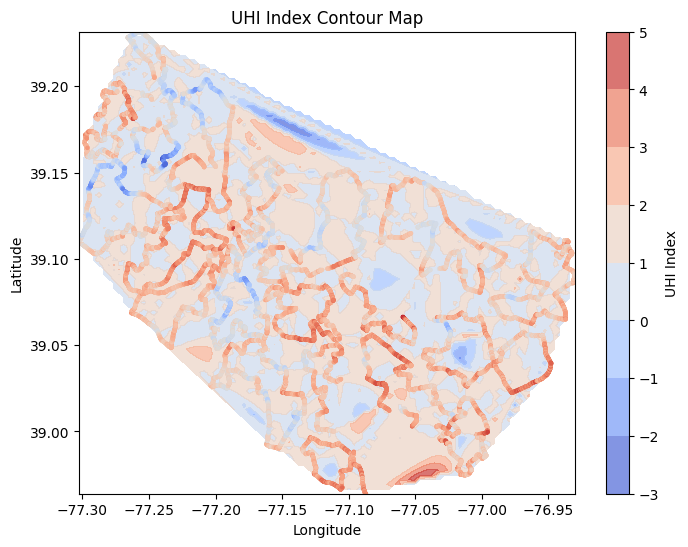

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

grid_x, grid_y = np.mgrid[uhi_data.Longitude.min():uhi_data.Longitude.max():100j, 
                           uhi_data.Latitude.min():uhi_data.Latitude.max():100j]
grid_z = griddata((uhi_data.Longitude, uhi_data.Latitude), uhi_data["UHI Index"], (grid_x, grid_y), method='cubic')

plt.figure(figsize=(8, 6))
contour = plt.contourf(grid_x, grid_y, grid_z, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="UHI Index")
plt.scatter(uhi_data.Longitude, uhi_data.Latitude, c=uhi_data["UHI Index"], cmap="coolwarm", edgecolor="none", s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("UHI Index Contour Map")
plt.show()

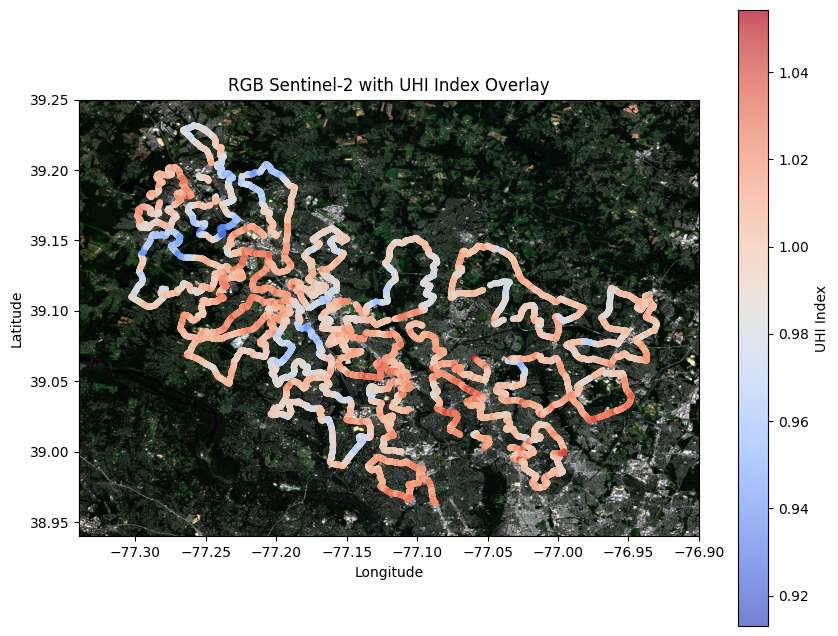

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

tiff_filepath = '/Users/ibolam/Projects/Abroad/01. UMD/25SPRING_DATA605/InfoChallege/Info-challenge-group-48/Satellite Data/S2_output_IC25(complete).tiff'

with rasterio.open(tiff_filepath) as src:
    red = src.read(4)  # B04 (Red)
    green = src.read(3)  # B03 (Green)
    blue = src.read(2)  # B02 (Blue)
    bounds = src.bounds  

def normalize_band(band):
    band_min, band_max = np.percentile(band, (1, 99))
    return np.clip((band - band_min) / (band_max - band_min), 0, 1)

red = normalize_band(red)
green = normalize_band(green)
blue = normalize_band(blue)
rgb_image = np.dstack((red, green, blue))

# red = red.astype(np.float32) / np.max(red)
# green = green.astype(np.float32) / np.max(green)
# blue = blue.astype(np.float32) / np.max(blue)
# rgb_image = np.dstack((red, green, blue))

plt.figure(figsize=(10, 8))
plt.imshow(rgb_image, extent=[bounds.left, bounds.right, bounds.bottom, bounds.top])
scatter = plt.scatter(
    uhi_data["Longitude"], uhi_data["Latitude"], 
    c=uhi_data["UHI Index"], cmap="coolwarm", edgecolor="none", s=20, alpha=0.7
)
plt.colorbar(scatter, label="UHI Index")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("RGB Sentinel-2 with UHI Index Overlay")
plt.show()

# Spatial Auto-correlation

### Calculation of Moran’s I

In [ ]:
import geopandas as gpd
import libpysal as ps
from esda.moran import Moran
from shapely.geometry import Point
import pandas as pd

geometry = [Point(xy) for xy in zip(uhi_data["Longitude"], uhi_data["Latitude"])]
gdf = gpd.GeoDataFrame(uhi_data, geometry=geometry)

w = ps.weights.KNN.from_dataframe(gdf, k=8)

mrn = []

for i in range(len(uhi_data.columns)):
    featurename = uhi_data.columns[i]
    moran = Moran(gdf[featurename], w)
    
    mrn.append({
        "features" : featurename,
        "moran's I" : moran.I,
        "pvalue" : moran.p_sim
    })
    
    print(f"Moran’s I: {moran.I}")
    print(f"P-value: {moran.p_sim}")

/Users/ibolam/miniforge3/envs/DL-torch310/lib/python3.10/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 39 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran’s I: 1.0000009602410074
P-value: 0.001
Moran’s I: 1.0000015107836773
P-value: 0.001
Moran’s I: 0.99999938236253
P-value: 0.001
Moran’s I: 0.9426726260917714
P-value: 0.001
Moran’s I: 0.9745846602985929
P-value: 0.001
Moran’s I: 0.9461555394648065
P-value: 0.001
Moran’s I: 0.9428648040074686
P-value: 0.001
Moran’s I: 0.9488074570342289
P-value: 0.001
Moran’s I: 0.9426652663291628
P-value: 0.001
Moran’s I: 0.8984912746398107
P-value: 0.001
Moran’s I: 0.9201919203023375
P-value: 0.001
Moran’s I: 0.9181000366428851
P-value: 0.001
Moran’s I: 0.9294967769781737
P-value: 0.001
Moran’s I: 0.9059296942109808
P-value: 0.001
Moran’s I: 0.943265958827748
P-value: 0.001
Moran’s I: 0.9583501650193762
P-value: 0.001
Moran’s I: 0.9454024188378012
P-value: 0.001
Moran’s I: 0.9582224372836154
P-value: 0.001
Moran’s I: 0.9581550958085773
P-value: 0.001
Moran’s I: 0.9416784821052692
P-value: 0.001
Moran’s I: 0.9581550958085773
P-value: 0.001
Moran’s I: 0.9533238741325373
P-value: 0.001
Moran’s I: 0.

In [8]:
mrndf = pd.DataFrame(mrn)
mrndf

features  moran's I  pvalue
0          Unnamed: 0   1.000001   0.001
1           Longitude   1.000002   0.001
2            Latitude   0.999999   0.001
3           UHI Index   0.942673   0.001
4                 B01   0.974585   0.001
5                 B02   0.946156   0.001
6                 B03   0.942865   0.001
7                 B04   0.948807   0.001
8                 B05   0.942665   0.001
9                 B06   0.898491   0.001
10                B07   0.920192   0.001
11                B08   0.918100   0.001
12                B8A   0.929497   0.001
13                B11   0.905930   0.001
14                B12   0.943266   0.001
15               NDVI   0.958350   0.001
16               NDBI   0.945402   0.001
17               NDWI   0.958222   0.001
18            B11/B12   0.958155   0.001
19                VWI   0.941678   0.001
20     Building_Index   0.958155   0.001
21         Soil_Ratio   0.953324   0.001
22  Vegetation_Health   0.949900   0.001
23          NDVI_NDBI   0.942525   0.001
24          NDVI_NDWI   0.951984   0.001
25          NDBI_NDWI   0.943025   0.001
26           B08_NDVI   0.948587   0.001

In [9]:
mrndf.to_csv("morans index_50buff.csv")

### Spatial Regression : GWR

In [ ]:
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
import numpy as np

X = gdf[['B01', 'B02', 'B05', 'B06', 'B08', 'B8A', 'B11', 'B12', 'NDVI', 'NDBI', 'Building_Index', 'Soil_Ratio', 'Vegetation_Health']].values
y = gdf['UHI Index'].values.reshape(-1, 1)

coords = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))

bandwidth = Sel_BW(coords, y, X).search()

model = GWR(coords, y, X, bandwidth)
gwr_results = model.fit()

print(gwr_results.summary())

Model type                                                         Gaussian
Number of observations:                                               30382
Number of covariates:                                                    14

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                              7.147
Log-likelihood:                                                   83808.720
AIC:                                                            -167589.441
AICc:                                                           -167587.425
BIC:                                                            -313439.372
R2:                                                                   0.207
Adj. R2:                                                              0.207

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [47]:
print(gdf[['B01', 'B02', 'B03', 'B04', 'B05',
       'B06', 'B07', 'B08', 'B8A', 'B11', 'B12', 'NDVI', 'NDBI', 'NDWI',
       'B11/B12', 'VWI', 'Building_Index', 'Soil_Ratio', 'Vegetation_Health',
       'NDVI_NDBI', 'NDVI_NDWI', 'NDBI_NDWI', 'B08_NDVI']].nunique())

B01                   1241
B02                   1324
B03                   1360
B04                   1560
B05                   1685
B06                   2130
B07                   2671
B08                   1415
B8A                   2900
B11                   1609
B12                   1565
NDVI                 29328
NDBI                 29415
NDWI                 29190
B11/B12              20746
VWI                  29415
Building_Index       20746
Soil_Ratio           20912
Vegetation_Health    29217
NDVI_NDBI            30361
NDVI_NDWI            30347
NDBI_NDWI            30360
B08_NDVI             29720
dtype: int64
